In [ ]:
# !python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_lg
# !python -m spacy download ja_core_news_sm
# !python -m spacy download de_core_news_lg

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
Traceback (most recent call last):
  File "/usr/lib/python3.8/runpy.py", line 185, in _run_module_as_main
    mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
  File "/usr/lib/python3.8/runpy.py", line 144, in _get_module_details
    return _get_module_details(pkg_main_name, error)
  File "/usr/lib/python3.8/runpy.py", line 111, in _get_module_details
    __import__(pkg_name)
  File "/usr/local/lib/python3.8/dist-packages/spacy/__init__.py", line 6, in <module>
    from .errors import setup_default_warnings
  File "/usr/local/lib/python3.8/dist-packages/spacy/errors.py", line 2, in <module>
    from .compat import Literal
  File "/usr/local/lib/python3.8/dist-packages/spacy/compat.py", line 3, in <module>
    from thinc.util import copy_array
  File "/usr/local/lib/python3.8/dist-packages/thinc/__init__.py", line 5, in <module>
 

In [ ]:
import spacy

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
spacy.__version__

'3.4.4'

In [ ]:
path = "https://raw.githubusercontent.com/Kamil128/Training_DS_NLP/main/all_djt_tweets.csv"
tweets = pd.read_csv(path)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
tweets.head()

,Unnamed: 0,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,0,Twitter for iPhone,Over 90% approval rating for your all time fav...,Mon Aug 27 00:39:38 +0000 2018,27040,106838.0,False,1.033877e+18
1,1,Twitter for iPhone,“Mainstream Media tries to rewrite history to ...,Sun Aug 26 22:01:33 +0000 2018,21346,76682.0,False,1.033837e+18
2,2,Twitter for iPhone,Fantastic numbers on consumer spending release...,Sun Aug 26 14:31:06 +0000 2018,18960,87334.0,False,1.033724e+18
3,3,Twitter for iPhone,"...And it will get, as I have always said, muc...",Sun Aug 26 14:27:16 +0000 2018,14963,62956.0,False,1.033723e+18
4,4,Twitter for iPhone,RT @realDonaldTrump: Social Media Giants are s...,Sun Aug 26 14:25:47 +0000 2018,50142,0.0,True,1.033722e+18


In [ ]:
tweets.shape

(328053, 8)

In [ ]:
tweet = tweets.loc[0, 'text']
print(tweet)

Over 90% approval rating for your all time favorite (I hope) President within the Republican Party and 52% overall. This despite all of the made up stories by the Fake News Media trying endlessly to make me look as bad and evil as possible. Look at the real villains please!


In [ ]:
nlp = spacy.load('en_core_web_lg')

In [ ]:
doc = nlp(tweet)

In [ ]:
type(doc)

spacy.tokens.doc.Doc

In [ ]:
doc

Over 90% approval rating for your all time favorite (I hope) President within the Republican Party and 52% overall. This despite all of the made up stories by the Fake News Media trying endlessly to make me look as bad and evil as possible. Look at the real villains please!

In [ ]:
text_doc = []
for token in doc:
  data = {
      'text': token.text,
      'lemma': token.lemma_,
      'POS': token.pos_,
      'TAG': token.tag_,
      'dep': token.dep_,
      'shape': token.shape_,
      'is_alpha': token.is_alpha,
      'is_stop': token.is_stop,
  }
  text_doc.append(data)

pd.DataFrame(text_doc)

,text,lemma,POS,TAG,dep,shape,is_alpha,is_stop
0,Over,over,ADP,IN,quantmod,Xxxx,True,True
1,90,90,NUM,CD,nummod,dd,False,False
2,%,%,NOUN,NN,compound,%,False,False
3,approval,approval,NOUN,NN,compound,xxxx,True,False
4,rating,rating,NOUN,NN,ROOT,xxxx,True,False
5,for,for,ADP,IN,prep,xxx,True,True
6,your,your,PRON,PRP$,poss,xxxx,True,True
7,all,all,DET,DT,det,xxx,True,True
8,time,time,NOUN,NN,npadvmod,xxxx,True,False
9,favorite,favorite,ADJ,JJ,pobj,xxxx,True,False


# NER

In [ ]:
doc

Over 90% approval rating for your all time favorite (I hope) President within the Republican Party and 52% overall. This despite all of the made up stories by the Fake News Media trying endlessly to make me look as bad and evil as possible. Look at the real villains please!

In [ ]:
def explain_text_entity(text: str):
  doc = nlp(text)
  for ent in doc.ents:
    print(f"""Entity: "{ent}" - LABEL - {ent.label_} - {spacy.explain(ent.label_)}""")

In [ ]:
explain_text_entity(tweets.loc[0, 'text'])

Entity: "Over 90%" - LABEL - PERCENT - Percentage, including "%"
Entity: "the Republican Party" - LABEL - ORG - Companies, agencies, institutions, etc.
Entity: "52%" - LABEL - PERCENT - Percentage, including "%"
Entity: "the Fake News Media" - LABEL - ORG - Companies, agencies, institutions, etc.


In [ ]:
explain_text_entity(tweets.loc[10, 'text'])

Entity: "Mexico" - LABEL - GPE - Countries, cities, states
Entity: "the hour" - LABEL - TIME - Times smaller than a day
Entity: "Mexico" - LABEL - GPE - Countries, cities, states


In [ ]:
def display_ent(text: str):
  doc = nlp(text)
  spacy.displacy.render(doc, style='ent', jupyter=True)

In [ ]:
display_ent(tweets.loc[0, 'text'])

In [ ]:
display_ent(tweets.loc[2, 'text'])

In [ ]:
display_ent(tweets.loc[420, 'text'])

# Redact namec

In [ ]:
def redact_names(text):
  doc = nlp(text)
  redacted_sentece = []

  with doc.retokenize() as retokenize:
    for ent in doc.ents:
      retokenize.merge(ent)

  for token in doc:
    if token.ent_type_ == "PERSON":
      redacted_sentece.append("[REDACTED]")
    else:
      redacted_sentece.append(token.text)
  return " ".join(redacted_sentece)

In [ ]:
redact_names(tweets.loc[420, 'text'])

'Today is the day to vote for [REDACTED] . Will be great for Georgia , full Endorsement ! https://t.co/yPND2bJ219'

In [ ]:
tweet = tweets.loc[420, 'text']
display_ent(tweet)

r_tweet = redact_names(tweet)
display_ent(r_tweet)

# Noun chunck

In [ ]:
for s in doc.sents:
  print(s)

Over 90% approval rating for your all time favorite (I hope)
President within the Republican Party and 52% overall.
This despite all of the made up stories by the Fake News Media trying endlessly to make me look as bad and evil as possible.
Look at the real villains please!


In [ ]:
example_text = tweets.loc[0, 'text']
doc = nlp(example_text)
display_ent(example_text)


In [ ]:
for idx, sentence in enumerate(doc.sents):
  for noun in sentence.noun_chunks:
    print(f"sentence: {idx + 1} has noun chunk: {noun}")

sentence: 1 has noun chunk: Over 90% approval rating
sentence: 1 has noun chunk: I
sentence: 2 has noun chunk: President
sentence: 2 has noun chunk: the Republican Party
sentence: 2 has noun chunk: 52%
sentence: 3 has noun chunk: This
sentence: 3 has noun chunk: all
sentence: 3 has noun chunk: the made up stories
sentence: 3 has noun chunk: the Fake News Media
sentence: 3 has noun chunk: me
sentence: 4 has noun chunk: the real villains


# analiza semantyczna

In [ ]:
tweets

,Unnamed: 0,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,0,Twitter for iPhone,Over 90% approval rating for your all time fav...,Mon Aug 27 00:39:38 +0000 2018,27040,106838.0,False,1.033877e+18
1,1,Twitter for iPhone,“Mainstream Media tries to rewrite history to ...,Sun Aug 26 22:01:33 +0000 2018,21346,76682.0,False,1.033837e+18
2,2,Twitter for iPhone,Fantastic numbers on consumer spending release...,Sun Aug 26 14:31:06 +0000 2018,18960,87334.0,False,1.033724e+18
3,3,Twitter for iPhone,"...And it will get, as I have always said, muc...",Sun Aug 26 14:27:16 +0000 2018,14963,62956.0,False,1.033723e+18
4,4,Twitter for iPhone,RT @realDonaldTrump: Social Media Giants are s...,Sun Aug 26 14:25:47 +0000 2018,50142,0.0,True,1.033722e+18
...,...,...,...,...,...,...,...,...
328048,34835,Twitter Web Client,"""My persona will never be that of a wallflower...",Tue May 12 14:07:28 +0000 2009,1421,1950.0,False,1.773561e+09
328049,34836,Twitter Web Client,New Blog Post: Celebrity Apprentice Finale and...,Fri May 08 20:40:15 +0000 2009,8,27.0,False,1.741161e+09
328050,34837,Twitter Web Client,Donald Trump reads Top Ten Financial Tips on L...,Fri May 08 13:38:08 +0000 2009,3,2.0,False,1.737480e+09
328051,34838,Twitter Web Client,Donald Trump will be appearing on The View tom...,Tue May 05 01:00:10 +0000 2009,2,3.0,False,1.701461e+09


In [ ]:
text = tweets['text'].str.cat(sep=' ')

In [ ]:
max_length = 1_000_000 - 1
text = text[:max_length]

In [ ]:
text

'Over 90% approval rating for your all time favorite (I hope) President within the Republican Party and 52% overall. This despite all of the made up stories by the Fake News Media trying endlessly to make me look as bad and evil as possible. Look at the real villains please! “Mainstream Media tries to rewrite history to credit Obama for Trump accomplishments. Since President Trump took office, the economy is booming. The stronger the economy gets, the more desperate his critics are. O had weakest recovery since Great Depression.” @WashTimes Fantastic numbers on consumer spending released on Friday. Stock Market hits all time high! ...And it will get, as I have always said, much better from even here! https://t.co/El26RzBjpG RT @realDonaldTrump: Social Media Giants are silencing millions of people. Can’t do this even if it means we must continue to hear Fake New… RT @realDonaldTrump: Big story out that the FBI ignored tens of thousands of Crooked Hillary Emails, many of which are REALLY

In [ ]:
import re

url_reg = r'[a-z]*[:.]\S+'
text = re.sub(url_reg, '', text)

In [ ]:
text

'Over 90% approval rating for your all time favorite (I hope) President within the Republican Party and 52% overall. This despite all of the made up stories by the Fake News Media trying endlessly to make me look as bad and evil as possible. Look at the real villains please! “Mainstream Media tries to rewrite history to credit Obama for Trump accomplishments. Since President Trump took office, the economy is booming. The stronger the economy gets, the more desperate his critics are. O had weakest recovery since Great D @WashTimes Fantastic numbers on consumer spending released on Friday. Stock Market hits all time high!  it will get, as I have always said, much better from even here!  RT @realDonaldTrump: Social Media Giants are silencing millions of people. Can’t do this even if it means we must continue to hear Fake New… RT @realDonaldTrump: Big story out that the FBI ignored tens of thousands of Crooked Hillary Emails, many of which are REALLY BAD. Also gav… RT @realDonaldTrump:  ab

In [ ]:
%%time
doc = nlp(text)

CPU times: user 32.9 s, sys: 7.38 s, total: 40.3 s
Wall time: 40.8 s


In [ ]:
# items_of_interest = []
# for x in doc.noun_chunks:
#   items_of_interest.append(x.text)
items_of_interest = [x.text for x in doc.noun_chunks]
# items_of_interest = list(doc.noun_chunks)

In [ ]:
items_of_interest

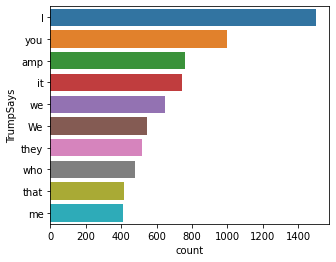

In [ ]:
df_nouns = pd.DataFrame(items_of_interest, columns=['TrumpSays'])

plt.figure(figsize=(5, 4))
sns.countplot(y='TrumpSays',
               data=df_nouns,
               order=df_nouns['TrumpSays'].value_counts().iloc[:10].index)
plt.show()

In [ ]:
trump_topic = []

for token in doc:
  if (not token.is_stop) and \
      (token.pos_ == 'NOUN') and \
      (len(token.text) > 3):
      trump_topic.append(token.text)

In [ ]:
trump_topic

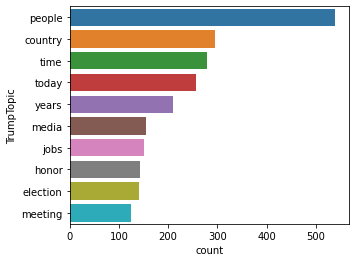

In [ ]:
df_nouns = pd.DataFrame(trump_topic, columns=['TrumpTopic'])

plt.figure(figsize=(5, 4))
sns.countplot(y='TrumpTopic',
              data=df_nouns,
              order=df_nouns['TrumpTopic'].value_counts().iloc[:10].index)
plt.show()

In [ ]:
trump_ent = []

for ent in doc.ents:
  if ent.label_ not in ['PERCENT', 'DATE', 'TIME', 'CARDINAL']:
    trump_ent.append(ent.text)

In [ ]:
trump_ent

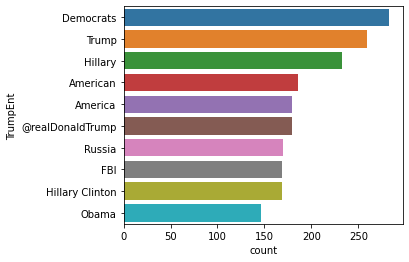

In [ ]:
df_ent = pd.DataFrame(trump_ent, columns=['TrumpEnt'])

plt.figure(figsize=(5, 4))
sns.countplot(y='TrumpEnt',
              data=df_ent,
              order=df_ent['TrumpEnt'].value_counts().iloc[:10].index)
plt.show()

# Word Cloud

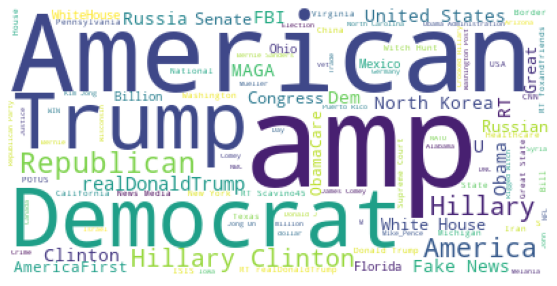

In [ ]:
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS

plt.figure(figsize=(10, 5))
wordcloud = WordCloud(background_color='white',
                      stopwords=STOP_WORDS,
                      max_words=100,
                      # max_font_size=30,
                      random_state=42 
                      ).generate("\n".join(trump_ent))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
"\n".join(trump_ent)

'the Republican Party\nthe Fake News Media\nObama\nTrump\nTrump\nRT @realDonaldTrump\nSocial Media Giants\nFBI\nChristopher Steele &amp\nDossier\nthe Clinton Foundation\nDepartment of Justice\nJeff\nGREAT\nJohn McCain\nMexico\nTrade Agreement\nMexico\nFBI\nFBI\nHillary Clinton\nFBI\nCabinet\nBob Mueller\nDems\nMichaels Cohen\nTrump\nTrump Tower\nthe Fake News Media\nVince\nGreat #StateDinner2018\nOhio\nSenate\nBlueprint\nHouse\nAmerican\nAmericanPatientsFirst Congratulations\nAustralian\nScott Morrison\nthe United States\nAustralia\nDavid Ige\nHawaii\nHawaii\nState\nThe Federal Government\nHawaii\nOhio\nPompeo\nNorth Korea\nChina\nKim\nChina\nthe UN Sanctions\nState\nMike Pompeo\nNorth Korea\nSocial Media Giants\nFake News\nCNN\nHillary Clinton\nJeff\nChristopher Steele &amp\nDossier\nthe Clinton Foundation\nTrump Campaign\nRussian\nDems\nJeff\nDepartment of Justice\nJeff\nGREAT\nComey\nMueller\nMcCabe, Strzok, Page\nElection\nU Target\n@DRUDGE_REPORT\nPolls\nRT @DanScavino\n@realDonal

#Matcher

In [ ]:
from spacy.matcher import Matcher
# doc = nlp(text) - zdefiniowane wcześniej
matcher = Matcher(nlp.vocab)
matched_sents = [] # collect data of matched sentences to be visualized

def collect_sents(matcher, doc, i, matches, label='MATCH'):
    """
    Function to help reformat data for displacy visualization
    """
    match_id, start, end = matches[i]
    span = doc[start : end]  # matched span
    sent = span.sent  # sentence containing matched span
    
    # append mock entity for match in displaCy style to matched_sents
    
    if doc.vocab.strings[match_id] == 'DEMOCRATS':  # don't forget to get string!
        match_ents = [{'start': span.start_char - sent.start_char,
                   'end': span.end_char - sent.start_char,
                   'label': 'DEMOCRATS'}]
        matched_sents.append({'text': sent.text, 'ents': match_ents })
    elif doc.vocab.strings[match_id] == 'RUSSIA':  # don't forget to get string!
        match_ents = [{'start': span.start_char - sent.start_char,
               'end': span.end_char - sent.start_char,
               'label': 'RUSSIA'}]
        matched_sents.append({'text': sent.text, 'ents': match_ents })
    elif doc.vocab.strings[match_id] == 'I':  # don't forget to get string!
        match_ents = [{'start': span.start_char - sent.start_char,
               'end': span.end_char - sent.start_char,
               'label': 'NARC'}]
        matched_sents.append({'text': sent.text, 'ents': match_ents })

In [ ]:
russia_pattaern = [[{'LOWER': 'russia'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'}, {'POS': 'ADJ'}]] 
democrats_pattern = [[{'LOWER': 'democrats'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'}, {'POS': 'ADJ'}]]
i_pattern = [[{'LOWER': 'i'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'}, {'POS': 'ADJ'}]]

In [ ]:
matcher.add('DEMOCRATS', democrats_pattern, on_match=collect_sents)
matcher.add('RUSSIA', russia_pattaern, on_match=collect_sents)
matcher.add('I', i_pattern, on_match=collect_sents)
matches = matcher(doc)

In [ ]:
spacy.displacy.render(matched_sents, style='ent', jupyter=True, manual=True, 
                      options={'colors': {'NARC': '#6290c8', 'RUSSIA': '#cc2936', 'DEMOCRATS':'#f2cd5d'}})

# Parser

In [ ]:
example_tweet = tweets.loc[180, 'text']
doc = nlp(example_tweet)

In [ ]:
spacy.displacy.render(doc, jupyter=True, style='dep')

In [ ]:
df_data = []

for token in doc:
  data = {
      'text': token.text,
      'dep': token.dep_,
      'pos': token.pos_,
      'head_text': token.head.text,
      'head_pos': token.head.pos_,
      'child': [child for child in token.children]
  }
  df_data.append(data)
pd.DataFrame(df_data)

,text,dep,pos,head_text,head_pos,child
0,Wacky,compound,PROPN,Omarosa,PROPN,[]
1,Omarosa,nsubj,PROPN,has,VERB,[Wacky]
2,already,advmod,ADV,has,VERB,[]
3,has,ROOT,VERB,has,VERB,"[Omarosa, already, Agreement, !]"
4,a,det,DET,Agreement,PROPN,[]
5,fully,advmod,ADV,signed,VERB,[]
6,signed,amod,VERB,Agreement,PROPN,[fully]
7,Non,compound,PROPN,Agreement,PROPN,[]
8,-,compound,PROPN,Agreement,PROPN,[]
9,Disclosure,compound,PROPN,Agreement,PROPN,[]


In [ ]:
!pip install textacy

In [ ]:
from textacy.spacier import utils as spacy_utils

In [ ]:
for s in doc.sents:
  print(s)

Wacky Omarosa already has a fully signed Non-Disclosure Agreement!


In [ ]:
spacy_utils.get_subjects_of_verb(s.root)

[Omarosa]

In [ ]:
spacy_utils.get_objects_of_verb(s.root)

[Agreement]

In [ ]:
def ask_question(text: str):
  doc = nlp(text)

  for sentence in doc.sents:
    print(sentence.text)

    ask_about = spacy_utils.get_subjects_of_verb(sentence.root)
    answers = spacy_utils.get_objects_of_verb(sentence.root)
    
    if ask_about and answers:
      if sentence.root.lemma_ == "be":
        quection = f"What {sentence.root} {ask_about[0]}?"
      else:
        question = f"What does {ask_about[0]} {sentence.root.lemma_}?"
      print(question)
      print(f"Answer: {answers[0]}")
    else:
      print("...")

In [ ]:
ask_question(example_tweet)

Wacky Omarosa already has a fully signed Non-Disclosure Agreement!
What does Omarosa have?
Answer: Agreement
